In [1]:
#!../xptopics/bin/python
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import torch

# import the class MLP which is inherited from torch.nn.module. 
# this function is defined in another file.
from MLP_module import MLP, train_model, exact_solution_example

In [14]:
# Define the basis for the variables. 
obj = torch.linspace(0, 1, 1000).reshape(-1, 1)
tobj = torch.ones_like(obj) * 0.6

# Create the input for the neural network.
# The input is a concatenation of the variables.
# The input is a 4D tensor with shape (1000, 4).
r = torch.cat([obj, obj, obj, tobj], dim=1)

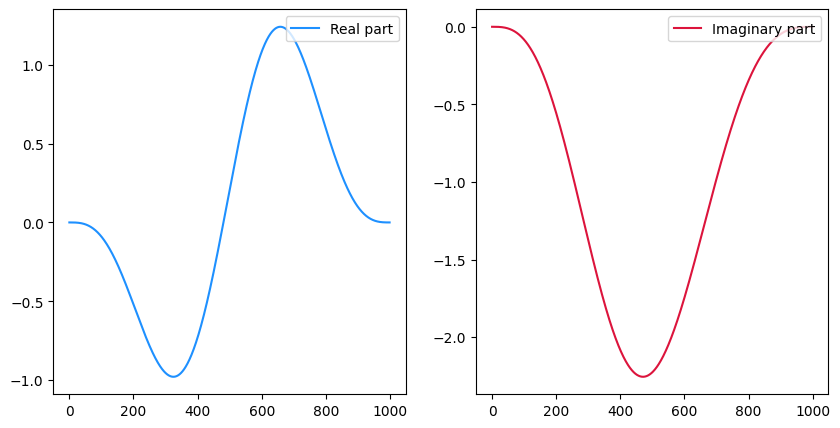

In [21]:
exact_sol = exact_solution_example(r, 0.1, plot=True)

In [17]:
# Create the set of parameters
# The input vector mut be of size 4 dimensions x, y, z and t
# The output vector must be of size 2 dimensions, which are
# The real and imaginary parts of the wave function

# Set the hyperparameters
hparams = {
    'input_dim': 4, 
    'out_dim': 2, 
    'width': 32,
    'depth': 42,
    'activation': 'sigmoid', # The activation function
    'initialization': 'uniform', # The initialization of the weights
}

# Set the initial conditions
initial_conditions = {
    "mass": 1,
    "hbar": 1,
    "L": 1,
    "V": 0, # The potential is zero
    "N": 100, # The number of points in the domain
    "lambda_ic": 120, # The weight of the initial condition in the minimization
    "psi_0yzt": 0,
    "psi_Lyzt": 0,
    "psi_x0zt": 0,
    "psi_xLzt": 0,
    "psi_xy0t": 0,
    "psi_xyLt": 0
}

# Set the parameters for the PDE
boundary_conditions = {
    "lambda_bc": 1, # The weight of the boundary in the minimization
    "u0": exact_solution_example(r, 0).real, # The initial condition for the real part
    "v0": exact_solution_example(r, 0).imag, # The initial condition for the imaginary part
}

# Set the parameters for the training
params_set = {
    "L": initial_conditions["L"],
    "Number_of_points": initial_conditions["N"],
    "BCs": boundary_conditions,
    "ICs": initial_conditions,
    "eta": 0.0001, # The learning rate
    "l2_lambda": 1e-6, # The weight of the L2 regularization
    "num_epochs": 900 # The number of epochs
}

# Create the model as in the description
# The model is a MLP with 4 input dimensions and 2 output dimensions
# width = 18, depth = 6, activation = 'tanh', initialization = 'normal'
model_schr = MLP(hparams)

In [5]:
train_model(model_schr, params_set)

Epoch 100: Function Loss: 2.7273522762325344e-24, Boundary Loss: 0.20150955021381378, Initial_cond_loss: 2.1490094661712646, Total Loss: 258.0826416015625
Epoch 200: Function Loss: 1.7544550522041182e-23, Boundary Loss: 0.35877954959869385, Initial_cond_loss: 1.3107149600982666, Total Loss: 157.6445770263672
Epoch 300: Function Loss: 1.1535970556371884e-23, Boundary Loss: 0.7067664861679077, Initial_cond_loss: 1.1450543403625488, Total Loss: 138.11329650878906
Epoch 400: Function Loss: 6.056199554212965e-24, Boundary Loss: 0.8505493402481079, Initial_cond_loss: 1.1311452388763428, Total Loss: 136.58798217773438
Epoch 500: Function Loss: 3.388312204661669e-24, Boundary Loss: 0.880011796951294, Initial_cond_loss: 1.1304872035980225, Total Loss: 136.53846740722656
Epoch 600: Function Loss: 1.930112090476265e-24, Boundary Loss: 0.8837220072746277, Initial_cond_loss: 1.1304503679275513, Total Loss: 136.5377655029297
Epoch 700: Function Loss: 1.098052077401606e-24, Boundary Loss: 0.883984029

In [19]:
# Set the model to evaluation mode
model_schr.eval()

# Make predictions using the model
predictions = model_schr(r)

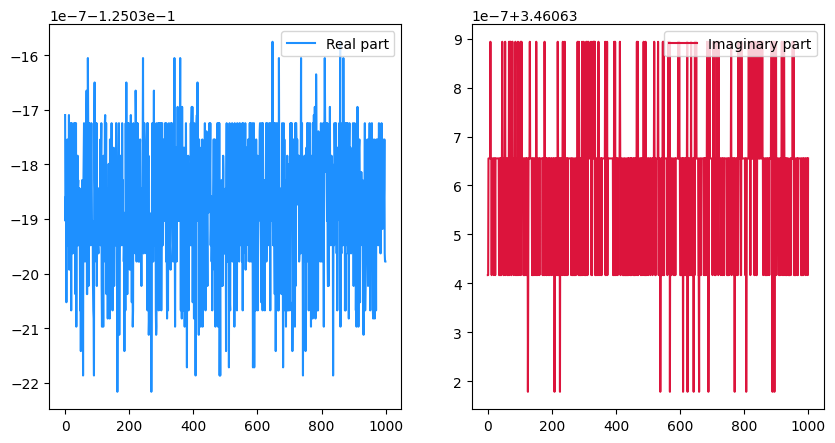

In [20]:
fig = plt.figure(figsize=(10, 5))
ax1, ax2 = fig.subplots(1, 2)

ax1.plot(predictions[:, 0:1].detach().numpy(),  color = 'dodgerblue', label='Real part')
ax1.legend(loc = 'upper right')
ax2.plot(predictions[:, 1:2].detach().numpy(), color = 'crimson', label='Imaginary part')
ax2.legend(loc = 'upper right')
plt.show()

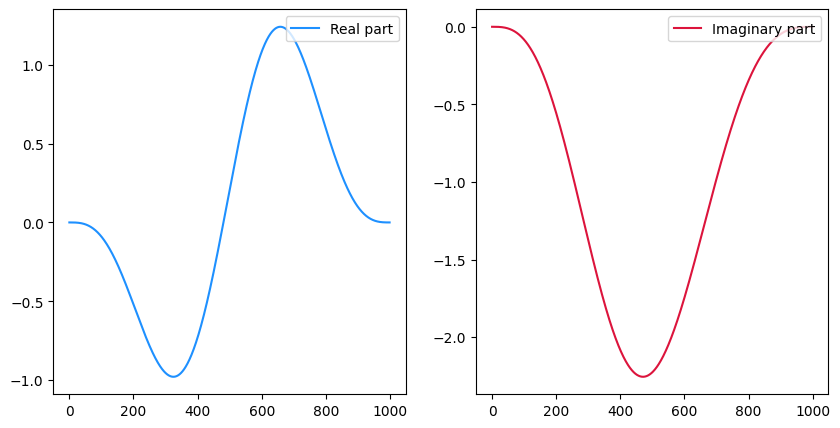

tensor([[ 0.0000e+00+0.0000e+00j],
        [-9.9702e-08-8.8619e-08j],
        [-7.9759e-07-7.0894e-07j],
        [-2.6917e-06-2.3926e-06j],
        [-6.3799e-06-5.6711e-06j],
        [-1.2460e-05-1.1076e-05j],
        [-2.1528e-05-1.9138e-05j],
        [-3.4181e-05-3.0388e-05j],
        [-5.1014e-05-4.5356e-05j],
        [-7.2623e-05-6.4572e-05j],
        [-9.9601e-05-8.8566e-05j],
        [-1.3254e-04-1.1787e-04j],
        [-1.7203e-04-1.5300e-04j],
        [-2.1867e-04-1.9450e-04j],
        [-2.7304e-04-2.4288e-04j],
        [-3.3572e-04-2.9869e-04j],
        [-4.0732e-04-3.6243e-04j],
        [-4.8840e-04-4.3463e-04j],
        [-5.7955e-04-5.1582e-04j],
        [-6.8135e-04-6.0652e-04j],
        [-7.9437e-04-7.0725e-04j],
        [-9.1920e-04-8.1853e-04j],
        [-1.0564e-03-9.4087e-04j],
        [-1.2066e-03-1.0748e-03j],
        [-1.3702e-03-1.2208e-03j],
        [-1.5479e-03-1.3795e-03j],
        [-1.7403e-03-1.5512e-03j],
        [-1.9479e-03-1.7367e-03j],
        [-2.1712e-03

In [8]:
exact_solution_example(r, 0.1, plot=True)